In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import calendar 

In [104]:
df = pd.read_csv(r"C:\Users\LENOVO\Desktop\SQL datasets\apple_5yr_one.csv")

In [106]:
df.head()

,Date,Close(AAPL),High(AAPL),Low(AAPL),Open(AAPL),Volume(AAPL)
0,6/4/2020,78.329315,79.131269,77.955067,78.832363,87560400
1,6/5/2020,80.560219,80.620973,78.550469,78.579630,137250400
2,6/8/2020,81.036537,81.070563,79.544415,80.256454,95654400
3,6/9/2020,83.595505,83.989192,80.684163,80.715756,147712400
4,6/10/2020,85.746208,86.215230,84.105842,84.545702,166651600


In [108]:
#1. **Trend Analysis**:  

In [110]:
   #- How has Apple's closing stock price trended over the 5-year period (2020-2024)?  

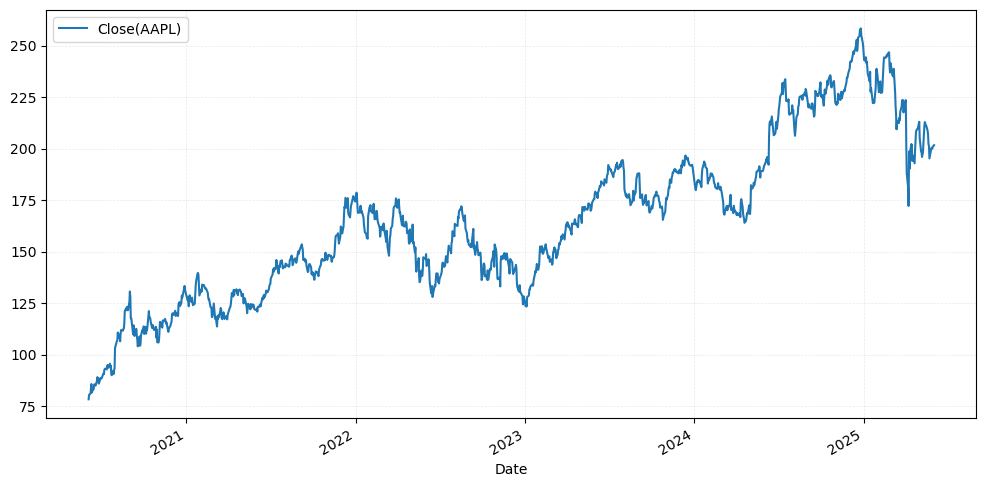

In [124]:
df['Date'] = pd.to_datetime(df['Date'])
ax = df.plot(x= 'Date', y = 'Close(AAPL)', figsize= (12,6))
ax.grid(True, linestyle='--', linewidth=0.5, color='lightgray', alpha=0.5)

In [ ]:
 #-What are the highest and lowest closing prices recorded, and on which dates did they occur? 

In [162]:
idx = df.groupby('Date')['Close(AAPL)'].idxmax()
max_row = df.loc[idx]
closing1 = max_row.sort_values('Close(AAPL)', ascending = False)
closing2 = max_row.sort_values('Close(AAPL)', ascending = True)
highest_closing = closing1[['Date','Close(AAPL)']].head(1)
lowest_closing =  closing2[['Date','Close(AAPL)']].head(1)

In [164]:
highest_closing

,Date,Close(AAPL)
1148,2024-12-26,258.396667


In [166]:
lowest_closing

,Date,Close(AAPL)
0,2020-06-04,78.329315


In [ ]:
2. **Volatility**:

In [ ]:
#  - Which year had the highest volatility in Apple's stock price (measured by standard deviation of daily returns)? 

In [188]:
df.set_index('Date', inplace =True)

In [190]:
df['Daily_returns'] = df['Close(AAPL)'].pct_change()

<Axes: xlabel='Date'>

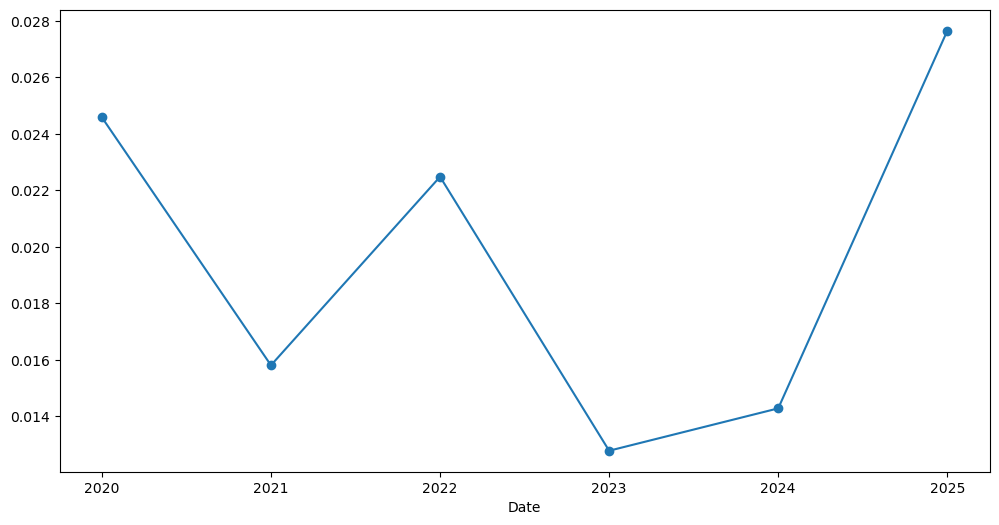

In [204]:
volatility = df['Daily_returns'].groupby(df.index.year).std()
volatility.plot(kind = 'line', figsize = (12,6),marker = 'o')

In [ ]:
#- What were the top 5 days with the largest price swings (high-low difference)?  

In [208]:
df= df.reset_index()

In [226]:
df['High_low_diff'] = (df['High(AAPL)'] - df['Low(AAPL)'])

In [228]:
top_5_largest = df.nlargest(5, 'High_low_diff')

In [230]:
top_5_largest

,Date,Close(AAPL),High(AAPL),Low(AAPL),Open(AAPL),Volume(AAPL),Daily_returns,High_low_diff
1218,2025-04-09,198.589584,200.347274,171.664885,171.724805,184395900,0.153288,28.682388
1217,2025-04-08,172.194199,190.090729,168.988411,186.455496,120859500,-0.049818,21.102318
1216,2025-04-07,181.222366,193.895735,174.391312,176.967936,160466300,-0.036734,19.504422
1048,2024-08-05,208.295883,212.506189,195.087649,198.163262,119548600,-0.048167,17.418540
1171,2025-01-31,235.432083,246.595158,232.878246,246.595158,101075100,-0.006692,13.716912


In [ ]:
#3. **Volume Analysis**:  

In [ ]:
#- On which days did Apple experience unusually high trading volume, and what were the corresponding price movements?  

In [232]:
df.head()

,Date,Close(AAPL),High(AAPL),Low(AAPL),Open(AAPL),Volume(AAPL),Daily_returns,High_low_diff
0,2020-06-04,78.329315,79.131269,77.955067,78.832363,87560400,NaN,1.176203
1,2020-06-05,80.560219,80.620973,78.550469,78.579630,137250400,0.028481,2.070504
2,2020-06-08,81.036537,81.070563,79.544415,80.256454,95654400,0.005913,1.526148
3,2020-06-09,83.595505,83.989192,80.684163,80.715756,147712400,0.031578,3.305029
4,2020-06-10,85.746208,86.215230,84.105842,84.545702,166651600,0.025728,2.109388


In [242]:
high_vol = df.nlargest(10, 'Volume(AAPL)')

In [244]:
high_vol_days = high_vol[['Date','Volume(AAPL)','Close(AAPL)']]

In [249]:
high_vol_days

,Date,Volume(AAPL),Close(AAPL)
40,2020-07-31,374336800,103.292061
56,2020-08-24,345937600,122.562767
55,2020-08-21,338054800,121.114204
65,2020-09-04,332607200,117.793480
1081,2024-09-20,318679900,227.400650
41,2020-08-03,308151200,105.894768
74,2020-09-18,287104900,104.043129
11,2020-06-19,264476000,84.987999
91,2020-10-13,262330500,117.929817
64,2020-09-03,257599600,117.715591


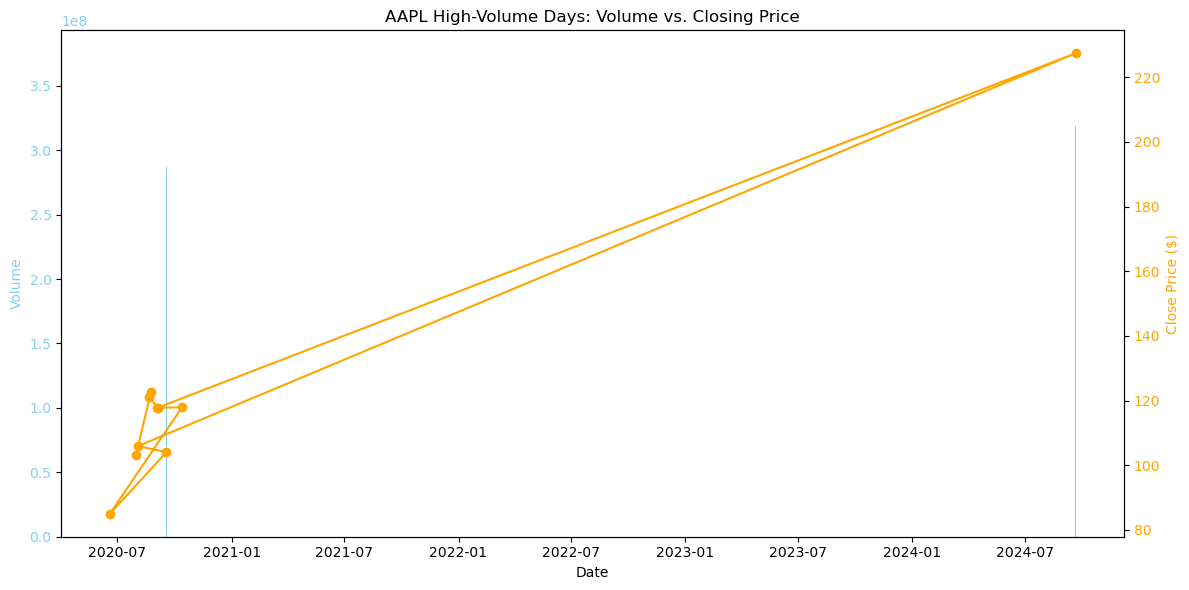

In [253]:
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(high_vol['Date'], high_vol['Volume(AAPL)'], color='skyblue', label='Volume (AAPL)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Volume', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

ax2 = ax1.twinx()
ax2.plot(high_vol['Date'], high_vol['Close(AAPL)'], color='orange', marker='o', label='Close Price (AAPL)')
ax2.set_ylabel('Close Price ($)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('AAPL High-Volume Days: Volume vs. Closing Price')
fig.tight_layout()
plt.show()

In [ ]:
# - Is there a correlation between trading volume and price changes (e.g., do high-volume days tend to coincide with price increases or decreases)?

In [257]:
df[['Volume(AAPL)','High_low_diff']].corr()

,Volume(AAPL),High_low_diff
Volume(AAPL),1.000000,0.308552
High_low_diff,0.308552,1.000000


In [259]:
"As one variable increases, the other tends to increase slightly but not strongly or reliably"

'As one variable increases, the other tends to increase slightly but not strongly or reliably'

In [ ]:
#4. **Monthly/Quarterly Performance**:   

In [ ]:
#- Which month or quarter historically performs best/worst for Apple's stock price?  

In [263]:
df['Month'] = df['Date'].dt.strftime('%B')

In [285]:
df.head()

In [287]:
monthly_avg = df.groupby('Month')['Daily_returns'].mean().sort_values(ascending = False)

In [291]:
monthly_avg
month_order = list(calendar.month_name)[1:]
monthly_avg = monthly_avg.reindex(month_order)

<Axes: xlabel='Month'>

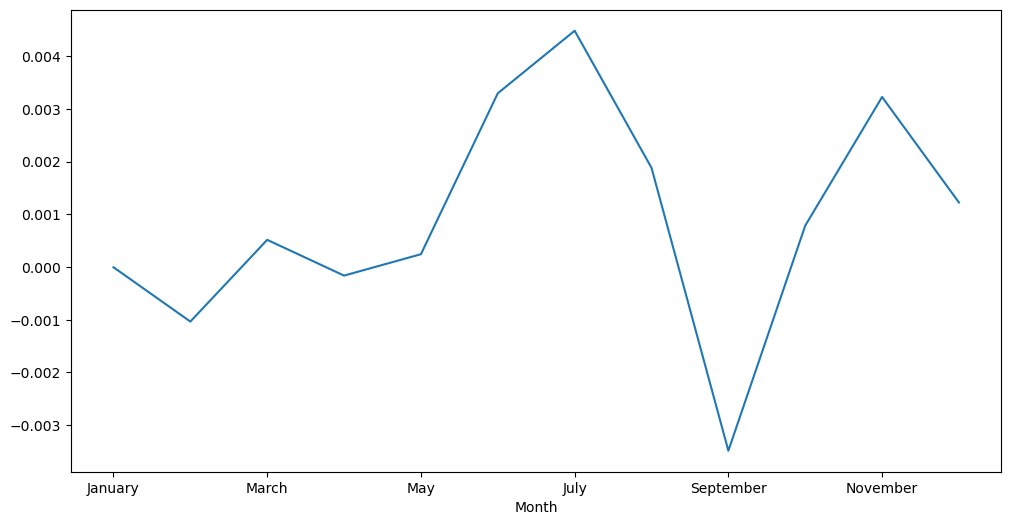

In [293]:
monthly_avg.plot(figsize =(12,6))

In [ ]:
   #- What is the average monthly return for Apple over the 5-year period? 

In [295]:
df.head()

,Date,Close(AAPL),High(AAPL),Low(AAPL),Open(AAPL),Volume(AAPL),Daily_returns,High_low_diff,Month
0,2020-06-04,78.329315,79.131269,77.955067,78.832363,87560400,NaN,1.176203,June
1,2020-06-05,80.560219,80.620973,78.550469,78.579630,137250400,0.028481,2.070504,June
2,2020-06-08,81.036537,81.070563,79.544415,80.256454,95654400,0.005913,1.526148,June
3,2020-06-09,83.595505,83.989192,80.684163,80.715756,147712400,0.031578,3.305029,June
4,2020-06-10,85.746208,86.215230,84.105842,84.545702,166651600,0.025728,2.109388,June


In [297]:
df.groupby("Month")['Daily_returns'].mean().reset_index()

,Month,Daily_returns
0,April,-0.000163
1,August,0.001882
2,December,0.001224
3,February,-0.001035
4,January,-0.000005
5,July,0.004482
6,June,0.003295
7,March,0.000516
8,May,0.000243
9,November,0.003225


In [ ]:
# **Seasonality**:  

In [ ]:
  # - Are there recurring seasonal patterns in Apple's stock performance (e.g., holiday effects)? 

In [323]:
monthlyavg = df.groupby('Month')['Daily_returns'].mean()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthlyavg.index =  pd.CategoricalIndex(monthlyavg.index, categories=month_order, ordered=True)
monthlyavg = monthlyavg.sort_index()

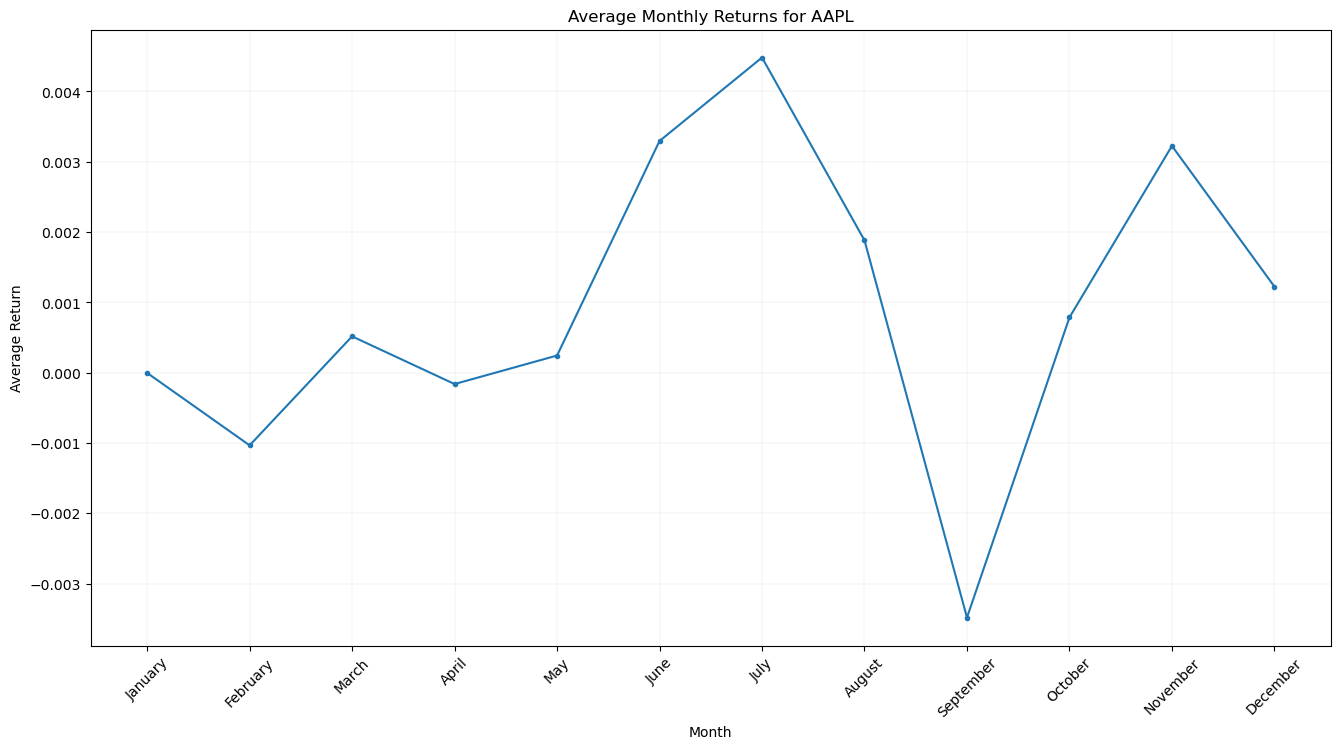

In [345]:
monthlyavg.plot( title='Average Monthly Returns for AAPL', figsize= (16,8),marker ='.')
plt.xlabel('Month')
plt.ylabel('Average Return')
plt.xticks(ticks=range(12), labels=month_order, rotation=45)
plt.grid(linewidth= 0.1, linestyle = '--', color = 'grey')

In [ ]:
#10. **Support/Resistance Levels**:  

In [ ]:
   # - What price levels have historically acted as strong support or resistance for Apple's stock? 

In [349]:
df['Rounded_close'] = df['Close(AAPL)'].round(-1)

In [355]:
support_resistance = df['Rounded_close'].value_counts().sort_index()

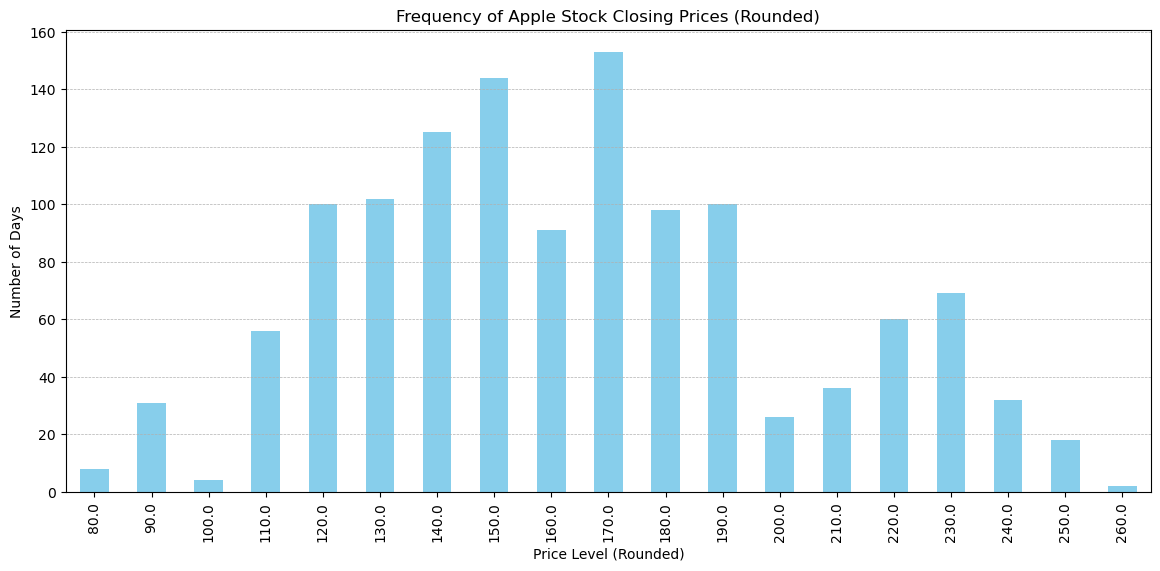

In [359]:
plt.figure(figsize=(14,6))
support_resistance.plot(kind='bar', color='skyblue')
plt.title('Frequency of Apple Stock Closing Prices (Rounded)')
plt.xlabel('Price Level (Rounded)')
plt.ylabel('Number of Days')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()

In [377]:
from scipy.signal import find_peaks 

In [379]:
resistance_indices, _ = find_peaks(df['Close(AAPL)'], distance=5)

In [381]:
support_indices, _ = find_peaks(-df['Close(AAPL)'], distance=5)

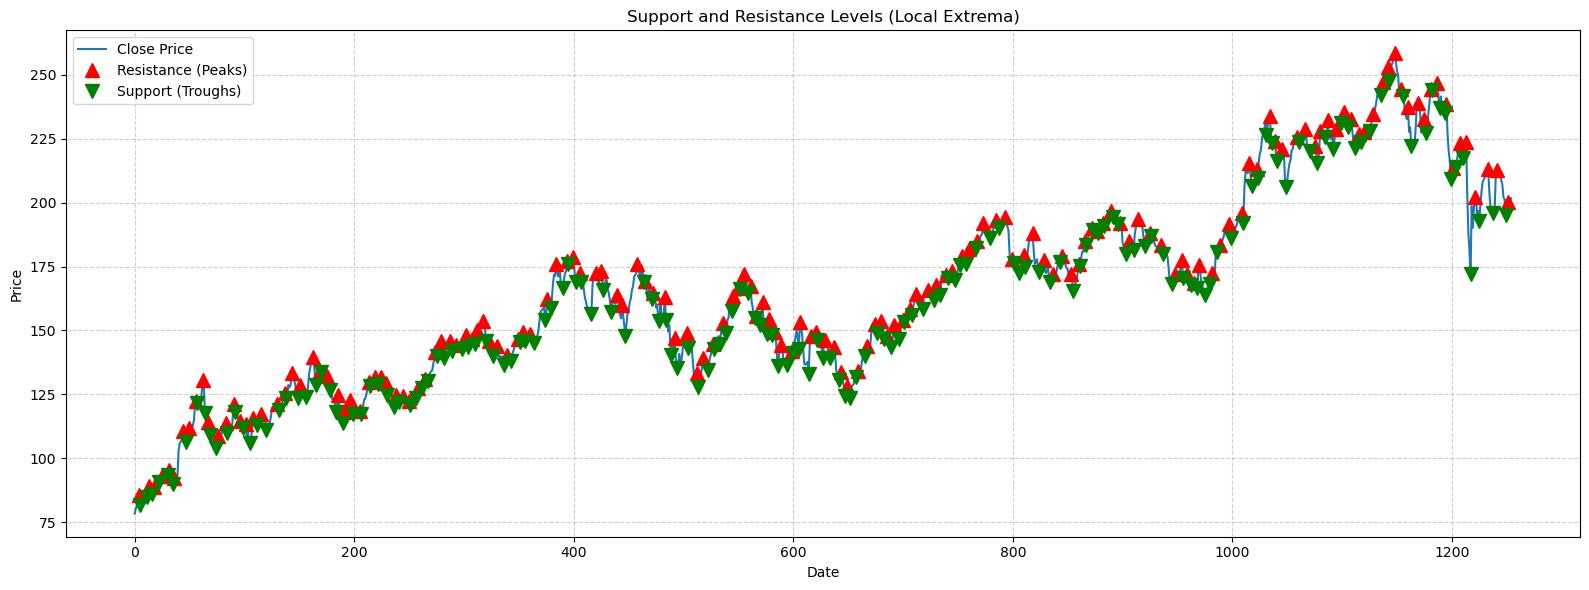

In [383]:
plt.figure(figsize=(16, 6))
plt.plot(df['Close(AAPL)'], label='Close Price', linewidth=1.5)

# Plot resistance levels (peaks)
plt.plot(df.iloc[resistance_indices].index, df.iloc[resistance_indices]['Close(AAPL)'], 'r^', label='Resistance (Peaks)', markersize=10)

# Plot support levels (troughs)
plt.plot(df.iloc[support_indices].index, df.iloc[support_indices]['Close(AAPL)'], 'gv', label='Support (Troughs)', markersize=10)

plt.title('Support and Resistance Levels (Local Extrema)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:




6. **Moving Averages**:  
   - How do the 50-day and 200-day moving averages compare, and what do crossovers indicate about trends?  
   - Did the stock consistently stay above/below certain moving averages during bullish/bearish periods?  

7. **Returns Distribution**:  
   - What is the distribution of daily returns (positive vs. negative days)?  
   - What is the maximum single-day percentage gain/loss, and when did it occur?  

 

9. **Correlation with Market**:  
   - How does Apple's stock performance correlate with broader market indices (if additional data is available)?  

 

These questions can help uncover trends, risks, and opportunities in Apple's stock behavior using pandas for data manipulation and analysis.